<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/Breast_Cancer_GroupProject_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Datasets/Breast_Cancer_data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.tail()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# This line of code removes columns with missing (NaN) values from the 'data' DataFrame.
# It is important because missing data can lead to errors or inaccuracies in data analysis and modeling.
# The 'axis' parameter is set to 'columns' to specify that we want to remove entire columns containing NaN values.

data = data.dropna(axis='columns')

In [ ]:

# 'describe' is used to generate descriptive statistics of the dataset.
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:

# The following line of code is used to analyze the 'diagnosis' column in a dataset named 'data'.
# It computes the count of each unique value in the 'diagnosis' column and returns the result as a series.
# This is an important step in data analysis to understand the distribution of values in the 'diagnosis' column.
# It helps in gaining insights into the data, such as the number of occurrences of each diagnosis category.

data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
# This line of code is used to retrieve the unique values from a specific column
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

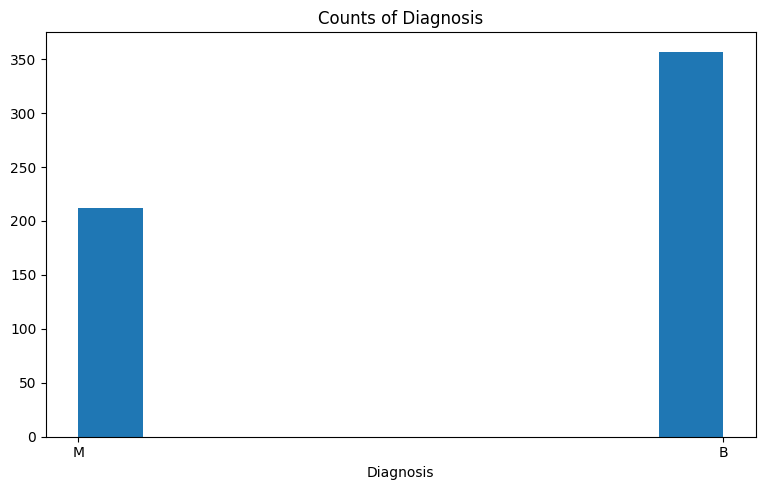

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data['diagnosis'])
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.tight_layout()
plt.show()

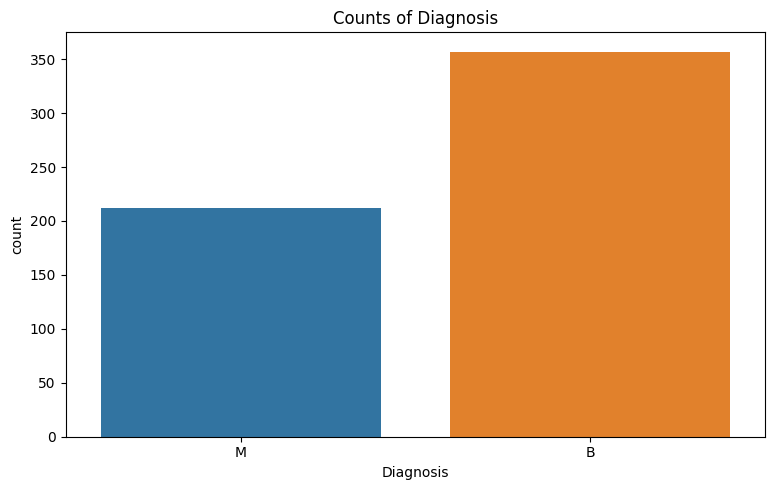

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='diagnosis', data=data)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")
plt.tight_layout()
plt.show()


In [ ]:
px.histogram(data, x='diagnosis')

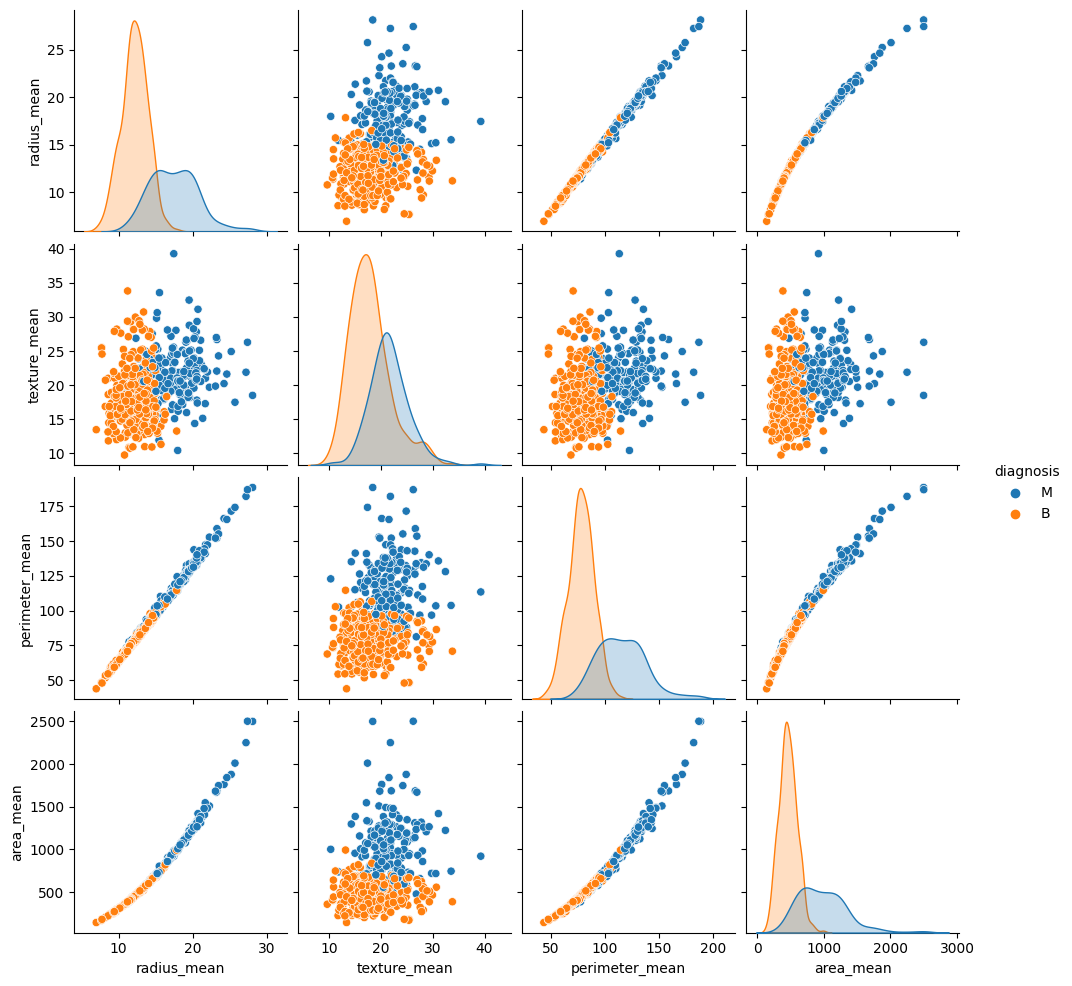

In [ ]:
#demonstrating pairplot
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

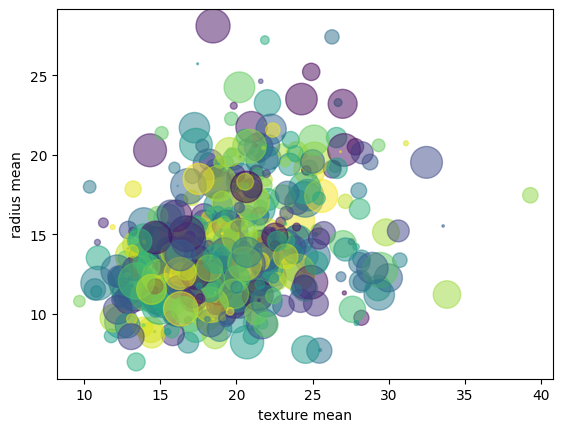

In [ ]:
#demonstrating scatterplot
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean")
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

In [ ]:
from sklearn.preprocessing import LabelEncoder
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

<ipython-input-23-ed4cc6e2f304>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


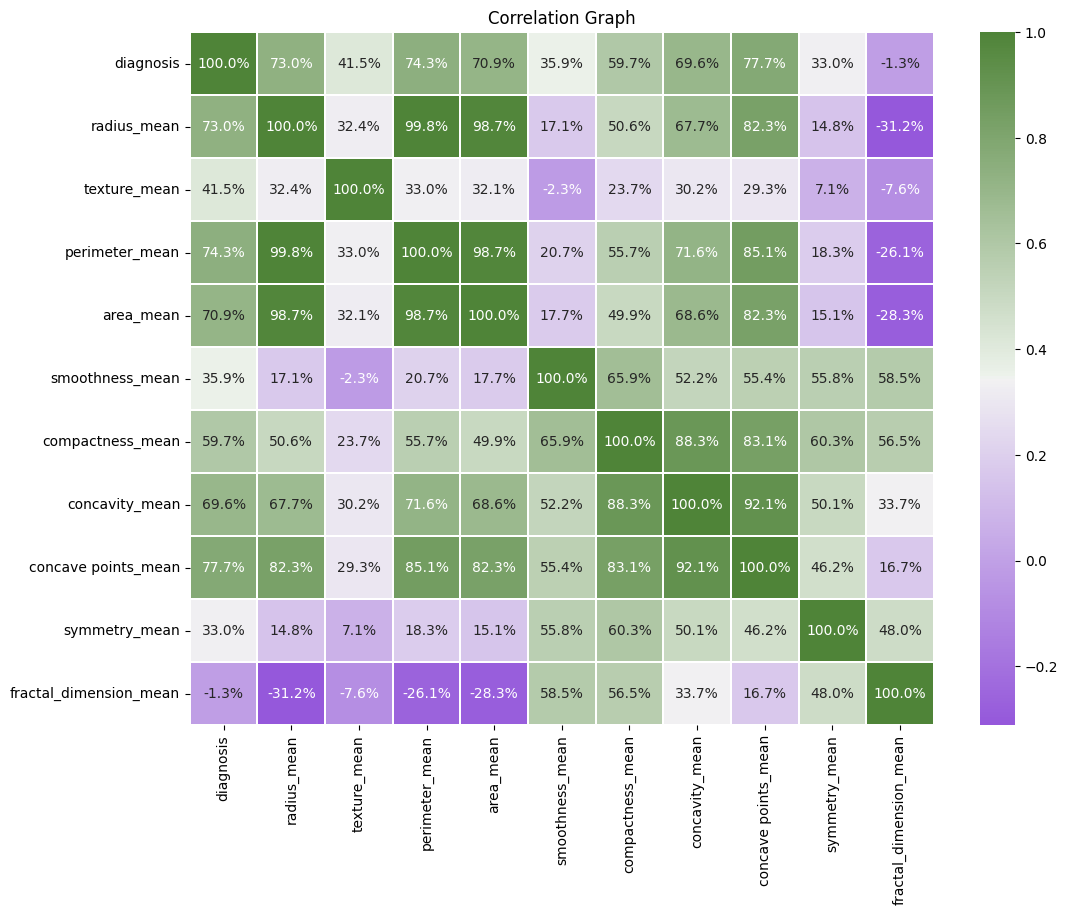

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [ ]:
plt.figure(figsize=(15, 10))


fig = px.imshow(data[cols].corr());
fig.show()

<Figure size 1500x1000 with 0 Axes>

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
targeted_feature = 'diagnosis'
len(prediction_feature)

6

In [ ]:
X = data[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [ ]:
y = data.diagnosis
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)


     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

In [ ]:
print(X_test)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
350       11.660           73.70      421.0         0.1671           0.03630   
222       10.180           65.12      313.1         0.1910           0.08502   
141       16.110          105.10      813.0         0.1861           0.11370   
447       14.800           95.88      674.8         0.1893           0.08890   
103        9.876           63.95      298.3         0.1945           0.09697   
..           ...             ...        ...            ...               ...   
218       19.800          129.70     1230.0         0.2094           0.13060   
24        16.650          110.00      904.6         0.1995           0.14570   
530       11.750           75.89      422.9         0.1598           0.09713   
204       12.470           81.09      481.9         0.1925           0.10580   
38        14.990           95.54      698.8         0.1565           0.05131   

     concave points_mean  
350         

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

In [ ]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [ ]:
def cm_metrix_graph(cm):

    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy            

In [ ]:
print(len(confusion_matrixs))

4


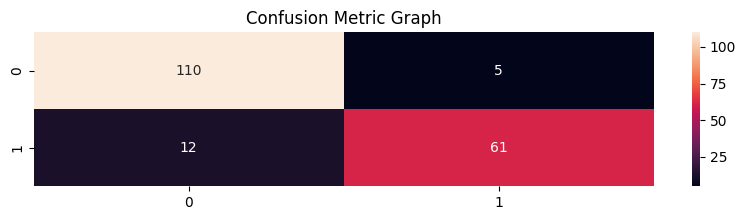

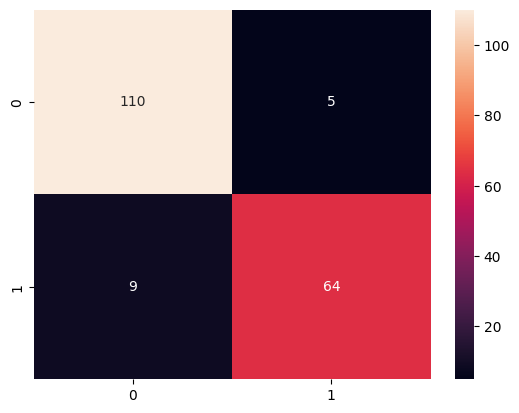

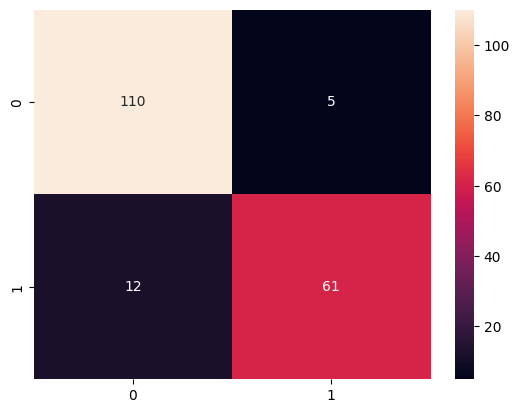

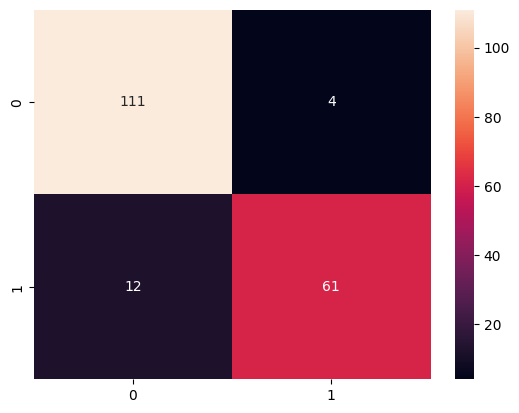

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 2))
plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):
  plt.xlabel("Negative Positive")
  plt.ylabel("True Positive")
  cm_metrix_graph(cm)
  plt.tight_layout(pad=True)

In [ ]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


In [ ]:
df_pred.sort_values('score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%


In [ ]:
df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%


In [ ]:
len(data)
print(len(X))

569


In [ ]:
cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.018117,0.004496,0.014173,0.015670,0.017167,0.020090,0.023013
score_time,3.0,0.003116,0.000544,0.002490,0.002942,0.003394,0.003430,0.003465
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


In [ ]:
def cross_val_scorring(model):
  #(score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

  model.fit(data[prediction_feature], data[targeted_feature])

  #score = model.score(X_train, y_train)

  predictions = model.predict(data[prediction_feature])
  accuracy = accuracy_score(predictions, data[targeted_feature])
  print("\nFull-Data Accuracy:", round(accuracy, 2))
  print("Cross Validation Score of'"+ str(name), "'\n")


  # Initialize K folds.
  kFold = KFold(n_splits=5) # define 5 diffrent data folds

  err = []
  for train_index, test_index in kFold.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)

  # Data Spliting via fold indexes
  X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
  y_train = data[targeted_feature].iloc[train_index] # all targeted features trains

  X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
  y_test = data[targeted_feature].iloc[test_index] # all targeted tests

  # Again Model Fitting
  model.fit(X_train, y_train)

  err.append(model.score(X_train, y_train))

  print("Score:", round(np.mean(err),  2) )

In [ ]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
  cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

TRAIN: [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340

In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier()

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

gsc = GridSearchCV(model, param_grid, cv=10)
gsc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
print("\n Best Score is ")
print(gsc.best_score_)


 Best Score is 
0.9237516869095816


In [ ]:
print("\n Best Estinator is ")
print(gsc.best_estimator_)


 Best Estinator is 
DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=8)


In [ ]:
print("\n Best Parametes are")
print(gsc.best_params_)


 Best Parametes are
{'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}


In [ ]:
model = SVC()

param_grid = [
              {'C': [1, 10, 100, 1000],
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']
              }
]

In [ ]:
gsc = GridSearchCV(model, param_grid, cv=10)
gsc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
print("\n Best Score is ")
print(gsc.best_score_)


 Best Score is 
0.9184885290148447


In [ ]:
print("\n Best Estinator is ")
print(gsc.best_estimator_)


 Best Estinator is 
SVC(C=10, gamma=0.001)


In [ ]:
print("\n Best Parametes are")
print(gsc.best_params_)


 Best Parametes are
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
model = RandomForestClassifier()

random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

gsc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [40, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]})

In [ ]:
print("\n Best Score is ")
print(gsc.best_score_)


 Best Score is 
0.913225371120108


In [ ]:
print("\n Best Estinator is ")
print(gsc.best_estimator_)


 Best Estinator is 
RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)


In [ ]:
print("\n Best Parametes are")
print(gsc.best_params_)


 Best Parametes are
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display the accuracy scores of each model
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

Random Forest: Accuracy = 0.94
Logistic Regression: Accuracy = 0.94
Support Vector Classifier: Accuracy = 0.92


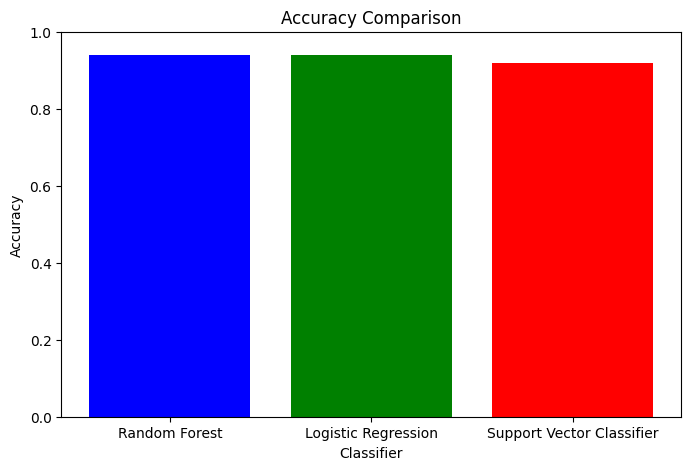

In [ ]:
classifiers = ['Random Forest', 'Logistic Regression', 'Support Vector Classifier']
accuracy = [0.94, 0.94, 0.92]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracy, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()

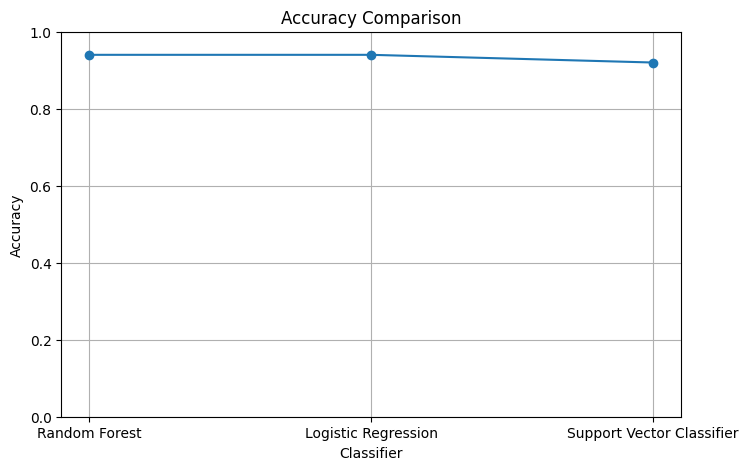

In [ ]:
classifiers = ['Random Forest', 'Logistic Regression', 'Support Vector Classifier']
accuracy = [0.94, 0.94, 0.92]

plt.figure(figsize=(8, 5))
plt.plot(classifiers, accuracy, marker='o', linestyle='-')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

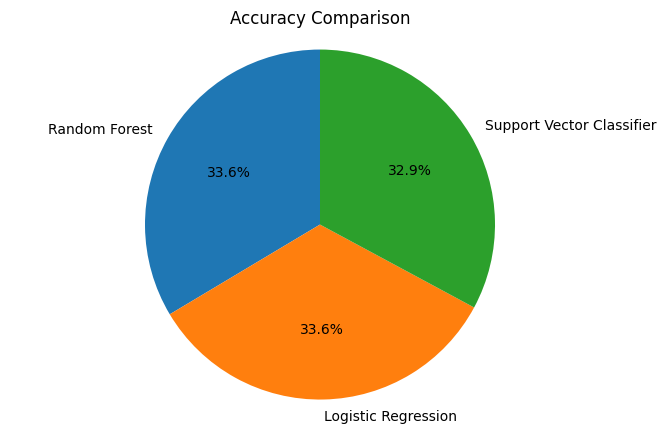

In [ ]:
classifiers = ['Random Forest', 'Logistic Regression', 'Support Vector Classifier']
accuracy = [0.94, 0.94, 0.92]

plt.figure(figsize=(8, 5))
plt.pie(accuracy, labels=classifiers, autopct='%1.1f%%', startangle=90)
plt.title('Accuracy Comparison')
plt.axis('equal')
plt.show()